# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [108]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

In [109]:
import pandas as pd
#1. Read it using pandas.
try:
    df = pd.read_csv('Real estate.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Real estate.csv' not found. Please upload the file or adjust the loading method.")
    df = None
# 2. Check for null values.
if df is not None:
    print("\nChecking for null values:")
    print(df.isnull().sum())

Dataset loaded successfully.

Checking for null values:
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


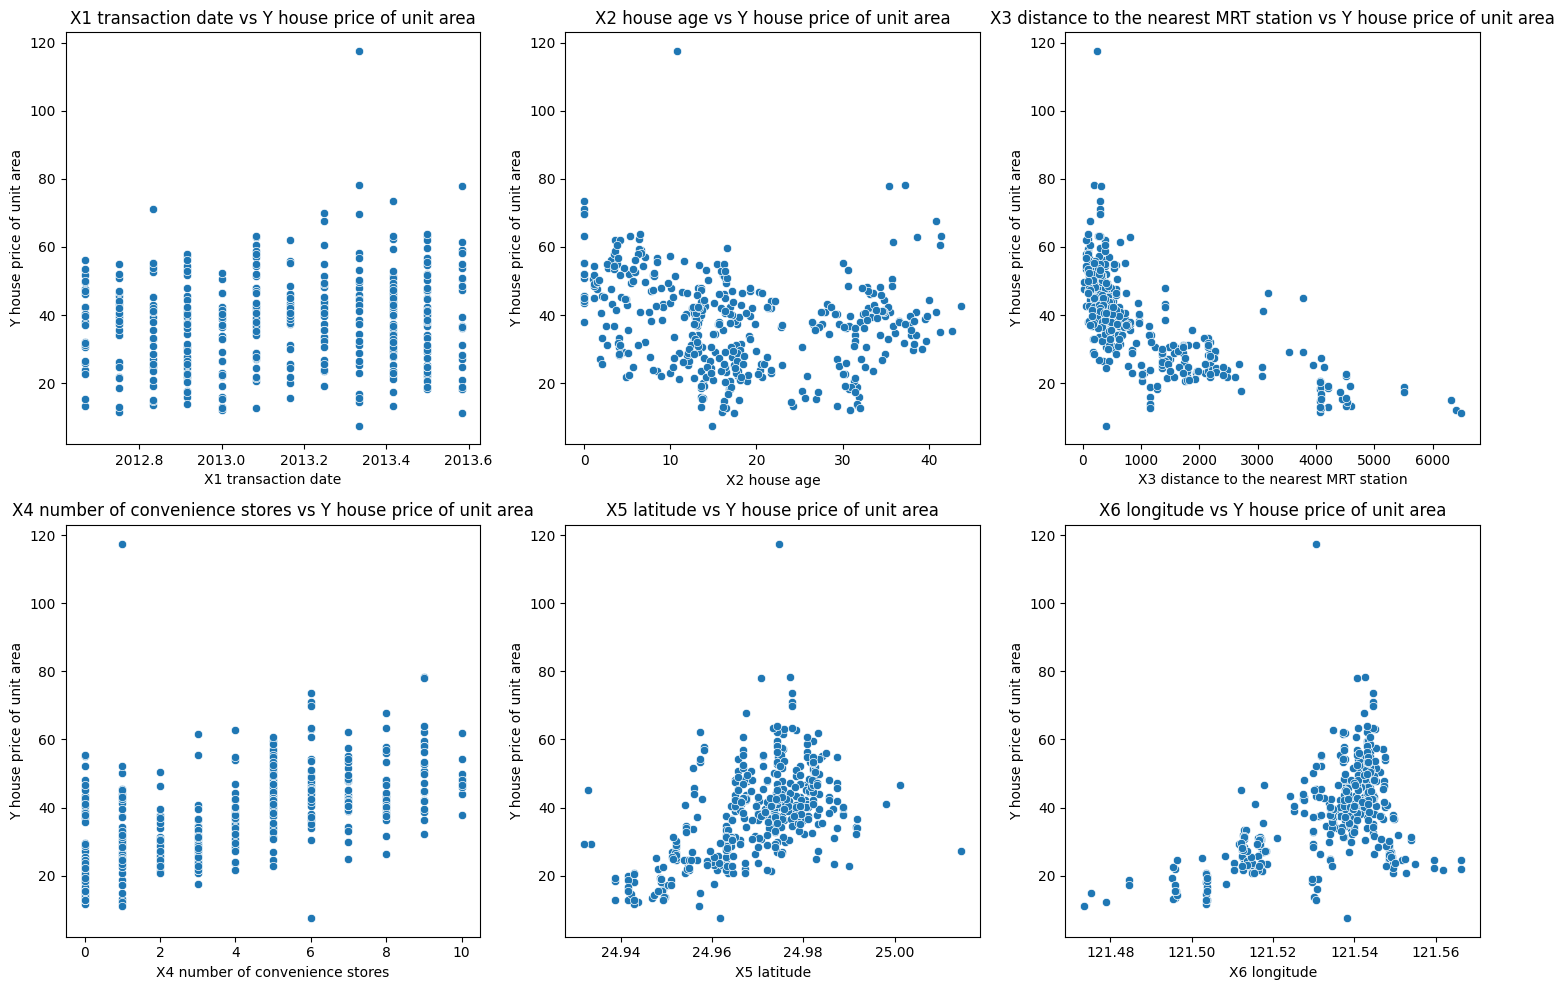

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
# 3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
if df is not None:
    # Get all column names except the first ('No') and the last ('Y house price of unit area')
    features = df.columns[1:-1]
    target = df.columns[-1]

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(features):
        plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f'{col} vs {target}')
    plt.tight_layout()
    plt.show()

In [111]:
# 4. Remove the unwanted columns.
if df is not None:
    # Remove the 'No' column as it's an identifier and not a feature
    df = df.drop('No', axis=1)
    print("Column 'No' removed successfully.")
    print("Updated DataFrame head:")
    print(df.head())

    # Separate features (X) and target (y)
    X = df.drop('Y house price of unit area', axis=1)
    y = df['Y house price of unit area']

    print("\nFeatures (X) head:")
    print(X.head())
    print("\nTarget (y) head:")
    print(y.head())

Column 'No' removed successfully.
Updated DataFrame head:
   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1     

In [112]:
from sklearn.model_selection import train_test_split
# 5. Split the dataset into train and test data. Test data size = 25% of total dataset.
if df is not None:
    # Split the dataset into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    print("\nDataset split into training and testing sets successfully.")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")


Dataset split into training and testing sets successfully.
X_train shape: (310, 6)
X_test shape: (104, 6)
y_train shape: (310,)
y_test shape: (104,)


In [113]:
from sklearn.preprocessing import MinMaxScaler
# 6. Normalize the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
if df is not None:
    # Initialize MinMaxScaler
    scaler = MinMaxScaler()

    # Fit the scaler on the training data and transform both training and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("\nFeatures (X_train and X_test) normalized successfully using MinMaxScaler.")
    print(f"X_train_scaled shape: {X_train_scaled.shape}")
    print(f"X_test_scaled shape: {X_test_scaled.shape}")


Features (X_train and X_test) normalized successfully using MinMaxScaler.
X_train_scaled shape: (310, 6)
X_test_scaled shape: (104, 6)


In [114]:
# 7. Fit the training data into the model created in question 1 and predict the testing data.
if 'LinearRegression' in locals() and X_train_scaled is not None and y_train is not None:
    model = LinearRegression(learning_rate=0.03, epochs=1500)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print("\nCustom Linear Regression model fitted and predictions made.")
    print(f"First 5 predictions: {y_pred[:5]}")
    print(f"First 5 actual values: {y_test[:5].values}")
else:
    print("Error: LinearRegression class or scaled data not available. Please ensure previous steps are executed.")


Custom Linear Regression model fitted and predictions made.
First 5 predictions: [47.41299924 40.75466099 39.87291386 35.73649743 26.22635668]
First 5 actual values: [45.1 42.3 52.2 37.3 22.8]


In [115]:
from sklearn.metrics import mean_squared_error, r2_score
# 8. Use mean square error and R2 from sklearn.metrics as evaluation criterias.
if 'y_pred' in locals() and 'y_test' in locals():
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)


    print(f"\nEvaluation of Custom Linear Regression Model:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2 Score): {r2:.2f}")
else:
    print("Error: Predictions or test data not available. Please ensure previous steps are executed.")


Evaluation of Custom Linear Regression Model:
Mean Squared Error (MSE): 65.98
R-squared (R2 Score): 0.58


In [116]:
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

# 9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R2.
if X_train_scaled is not None and y_train is not None:
    # Initialize and fit the scikit-learn Linear Regression model
    sklearn_model = SklearnLinearRegression()
    sklearn_model.fit(X_train_scaled, y_train)

    # Make predictions with the scikit-learn model
    y_pred_sklearn = sklearn_model.predict(X_test_scaled)
# 8. Use mean square error and R2 from sklearn.metrics as evaluation criterias.
    # Calculate Mean Squared Error for scikit-learn model
    mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
    # Calculate R-squared for scikit-learn model
    r2_sklearn = r2_score(y_test, y_pred_sklearn)

    print(f"\nEvaluation of Scikit-learn Linear Regression Model:")
    print(f"Mean Squared Error (MSE): {mse_sklearn:.2f}")
    print(f"R-squared (R2 Score): {r2_sklearn:.2f}")
else:
    print("Error: Scaled data not available for scikit-learn model. Please ensure previous steps are executed.")


Evaluation of Scikit-learn Linear Regression Model:
Mean Squared Error (MSE): 66.67
R-squared (R2 Score): 0.58


# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [117]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 1. Load the dataset from sklearn.datasets
breast_cancer = load_breast_cancer()

# 2. Separate out the X and Y columns.
X = breast_cancer.data
y = breast_cancer.target

print(f"Original X shape: {X.shape}")
print(f"Original y shape: {y.shape}")

# 3. Normalize the X data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print(f"Scaled X shape: {X_scaled.shape}")

# 4. Create a train-test-split. Take any suitable test size.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Original X shape: (569, 30)
Original y shape: (569,)
Scaled X shape: (569, 30)
X_train shape: (426, 30)
X_test shape: (143, 30)
y_train shape: (426,)
y_test shape: (143,)


5. Write code for the sigmoid function and Logistic regression.


In [118]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        # Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)

        # Initialize weights and bias
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        # Implement the GD algorithm
        for _ in range(self.epochs):
            # Linear combination of inputs and weights
            z = np.dot(X, self.weights) + self.bias
            # Apply sigmoid activation function
            y_pred = sigmoid(z)

            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        # Calculate linear combination of inputs and weights
        z = np.dot(X, self.weights) + self.bias
        # Apply sigmoid to get probabilities
        y_predicted_proba = sigmoid(z)
        # Convert probabilities to binary predictions (0 or 1)
        y_pred = (y_predicted_proba >= 0.5).astype(int)
        return y_pred.flatten()

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [119]:
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score

# 6. Fit your model on the dataset and make predictions.

# Custom Logistic Regression Model
custom_lr_model = LogisticRegression(learning_rate=0.03, epochs=1500)
custom_lr_model.fit(X_train, y_train) # Use original X_train, y_train for the custom model which expects unscaled X
y_pred_custom = custom_lr_model.predict(X_test)

# 8. Print accuracy_score for custom model
accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f"\nCustom Logistic Regression Model Accuracy: {accuracy_custom:.4f}")



Custom Logistic Regression Model Accuracy: 0.9650


In [120]:

# 7. Compare your model with the Sklearn Logistic Regression model.
# Sklearn Logistic Regression Model (default L2 penalty)
sklearn_lr_model_l2 = SklearnLogisticRegression(penalty='l2', solver='liblinear', random_state=42)
sklearn_lr_model_l2.fit(X_train, y_train)
y_pred_sklearn_l2 = sklearn_lr_model_l2.predict(X_test)

# 8. Print accuracy_score for Sklearn model with L2 penalty
accuracy_sklearn_l2 = accuracy_score(y_test, y_pred_sklearn_l2)
print(f"Sklearn Logistic Regression (L2 penalty) Accuracy: {accuracy_sklearn_l2:.4f}")

# Sklearn Logistic Regression Model (L1 penalty)
sklearn_lr_model_l1 = SklearnLogisticRegression(penalty='l1', solver='liblinear', random_state=42)
sklearn_lr_model_l1.fit(X_train, y_train)
y_pred_sklearn_l1 = sklearn_lr_model_l1.predict(X_test)

# 8. Print accuracy_score for Sklearn model with L1 penalty
accuracy_sklearn_l1 = accuracy_score(y_test, y_pred_sklearn_l1)
print(f"Sklearn Logistic Regression (L1 penalty) Accuracy: {accuracy_sklearn_l1:.4f}")

# Sklearn Logistic Regression Model (no penalty / 'none' is deprecated, so using C=large for minimal regularization)
# Note: For 'none' penalty, 'lbfgs', 'newton-cg', 'sag', 'saga' solvers support it.
sklearn_lr_model_nop = SklearnLogisticRegression(penalty=None, solver='lbfgs', random_state=42, max_iter=5000) # Increased max_iter significantly
sklearn_lr_model_nop.fit(X_train, y_train)
y_pred_sklearn_nop = sklearn_lr_model_nop.predict(X_test)

# 8. Print accuracy_score for Sklearn model with no penalty
accuracy_sklearn_nop = accuracy_score(y_test, y_pred_sklearn_nop)
print(f"Sklearn Logistic Regression (no penalty) Accuracy: {accuracy_sklearn_nop:.4f}")

# Sklearn Logistic Regression Model (elasticnet penalty)
sklearn_lr_model_elasticnet = SklearnLogisticRegression(penalty='elasticnet', solver='saga', random_state=42, l1_ratio=0.5, max_iter=5000) # Increased max_iter significantly
sklearn_lr_model_elasticnet.fit(X_train, y_train)
y_pred_sklearn_elasticnet = sklearn_lr_model_elasticnet.predict(X_test)

# 8. Print accuracy_score for Sklearn model with elasticnet penalty
accuracy_sklearn_elasticnet = accuracy_score(y_test, y_pred_sklearn_elasticnet)
print(f"Sklearn Logistic Regression (elasticnet penalty) Accuracy: {accuracy_sklearn_elasticnet:.4f}")

Sklearn Logistic Regression (L2 penalty) Accuracy: 0.9720
Sklearn Logistic Regression (L1 penalty) Accuracy: 0.9650
Sklearn Logistic Regression (no penalty) Accuracy: 0.9301
Sklearn Logistic Regression (elasticnet penalty) Accuracy: 0.9860


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [121]:
from sklearn.metrics import classification_report, confusion_matrix

# 9. and 10. For the best model in each case (yours and scikit-learn), print classification_report and confusion_matrix.

print("\n--- Evaluation for Custom Logistic Regression Model ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_custom))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))

print("\n--- Evaluation for Scikit-learn Logistic Regression Model (Elasticnet, best performing) ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_sklearn_elasticnet))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_sklearn_elasticnet))


--- Evaluation for Custom Logistic Regression Model ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        54
           1       0.95      1.00      0.97        89

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143

Confusion Matrix:
[[49  5]
 [ 0 89]]

--- Evaluation for Scikit-learn Logistic Regression Model (Elasticnet, best performing) ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.98      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

Confusion Matrix:
[[52  2]
 [ 0 89]]


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Load the data as you did in the 2nd question.
try:
    # Assuming the dataset is named 'glass.csv' based on the Kaggle link provided.
    # Please make sure to upload 'glass.csv' or adjust the path accordingly.
    df_glass = pd.read_csv('glass.csv')
    print("Glass dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'glass.csv' not found. Please upload the file or adjust the loading method.")
    df_glass = None

if df_glass is not None:
    print("\nGlass DataFrame head:")
    print(df_glass.head())

    X_glass = df_glass.drop('Type', axis=1) # If no 'id' column, just drop 'Type'

    y_glass = df_glass['Type']

    print("\nFeatures (X_glass) head:")
    print(X_glass.head())
    print("\nTarget (y_glass) head:")
    print(y_glass.head())

    # 3. Split it into training and testing datasets.
    X_train_glass, X_test_glass, y_train_glass, y_test_glass = train_test_split(
        X_glass, y_glass, test_size=0.2, random_state=42, stratify=y_glass
    ) # Stratify to maintain class distribution since it's a classification task

    print("\nGlass dataset split into training and testing sets successfully.")
    print(f"X_train_glass shape: {X_train_glass.shape}")
    print(f"X_test_glass shape: {X_test_glass.shape}")
    print(f"y_train_glass shape: {y_train_glass.shape}")
    print(f"y_test_glass shape: {y_test_glass.shape}")

Glass dataset loaded successfully.

Glass DataFrame head:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Features (X_glass) head:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0

Target (y_glass) head:
0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

Glass dataset split into training and testing sets successfully.
X_train_glass shape: (

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [123]:
import numpy as np
from collections import Counter

# 4. Define Euclidean distance.
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# 5. Build the KNN model.
class KNN:
    def __init__(self, k=5):
        self.k = k

    # 6. Fit the model on the training data.
    def fit(self, X, y):
        # Convert pandas DataFrames/Series to numpy arrays if they aren't already
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        # Convert input X to numpy array if it's not already
        X = np.array(X)
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Sort by distance and return indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [124]:
from sklearn.metrics import accuracy_score

if 'KNN' in locals() and 'X_train_glass' in locals() and 'y_train_glass' in locals():
    print("\n--- Custom KNN Model Evaluation ---")

    # Try k=3
    knn_model_k3 = KNN(k=3)
    knn_model_k3.fit(X_train_glass, y_train_glass)
    y_pred_custom_k3 = knn_model_k3.predict(X_test_glass)
    accuracy_custom_k3 = accuracy_score(y_test_glass, y_pred_custom_k3)
    print(f"Custom KNN (k=3) Accuracy: {accuracy_custom_k3:.4f}")

    # Try k=5 (default in our class)
    knn_model_k5 = KNN(k=6)
    knn_model_k5.fit(X_train_glass, y_train_glass)
    y_pred_custom_k5 = knn_model_k5.predict(X_test_glass)
    accuracy_custom_k5 = accuracy_score(y_test_glass, y_pred_custom_k5)
    print(f"Custom KNN (k=5) Accuracy: {accuracy_custom_k5:.4f}")

    # You can try more k values here...

else:
    print("Error: KNN class or glass dataset not available. Please ensure previous steps are executed.")


--- Custom KNN Model Evaluation ---
Custom KNN (k=3) Accuracy: 0.6512
Custom KNN (k=5) Accuracy: 0.7209


In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

if 'X_train_glass' in locals() and 'y_train_glass' in locals():
    print("\n--- Scikit-learn KNN Model Evaluation ---")

    # Try k=3 with scikit-learn KNN
    sklearn_knn_model_k3 = KNeighborsClassifier(n_neighbors=3)
    sklearn_knn_model_k3.fit(X_train_glass, y_train_glass)
    y_pred_sklearn_k3 = sklearn_knn_model_k3.predict(X_test_glass)
    accuracy_sklearn_k3 = accuracy_score(y_test_glass, y_pred_sklearn_k3)
    print(f"Scikit-learn KNN (k=3) Accuracy: {accuracy_sklearn_k3:.4f}")

else:
    print("Error: Glass dataset not available. Please ensure previous steps are executed.")


--- Scikit-learn KNN Model Evaluation ---
Scikit-learn KNN (k=3) Accuracy: 0.6744
